In [203]:
from numpy import arctan2,random,sin,cos,degrees
from haversine import haversine, Unit
import matplotlib.pyplot as pt
import numpy as np
import math
from math import radians, atan2

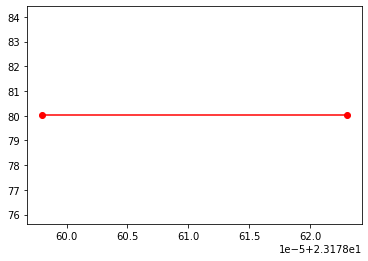

In [204]:
source_lat = 23.178261
source_long = 80.025970
b_lat = 12.883500
b_long= 77.576300
destination_lat = 23.178
destination_long = 80.025978
c_lat = 12.879300
c_long= 77.578300
source = np.array([source_lat, source_long])
destination = np.array([destination_lat, destination_long])
#li = np.array([[source_lat, source_long], [b_lat, b_long],[destination_lat, destination_long], [c_lat, c_long]])
li = np.array([[source_lat, source_long],[destination_lat, destination_long]])
xp,yp = zip(*li)
pt.plot(xp,yp, 'o-', color='r')
pt.show()

In [205]:
def heading (source, destination):
    delta =  destination[1] - source[1]
    X = np.cos( destination[0])* np.sin(delta)
    Y = np.cos(source[0])* np.sin(destination[0]) - np.sin(source[0])*np.cos(destination[0])* np.cos(delta)
    bearing = math.atan2(X,Y)
    dummy = ((np.degrees(bearing)+360) % 360)
    return 120

In [206]:
def desired_turn(gps_heading, compass_heading):
    targetHeading=gps_heading
    heading=compass_heading
    headingError = (targetHeading - heading)
    if (headingError < -180):
        headingError = headingError+360
    if (headingError > 180):
        headingError = headingError-360
    return headingError

In [207]:
def heading2(source, destination):
    dlon = np.radians(destination[1]-source[1])
    cLat = np.radians(source[0])
    tLat = np.radians(destination[0])
    a1 = np.sin(dlon) * np.cos(tLat)
    a2 = np.sin(cLat) * np.cos(tLat) * np.cos(dlon)
    a2 = np.cos(cLat) * np.sin(tLat) - a2
    a2 = np.arctan2(a1, a2)
    if (a2 < 0.0):
    
        a2 += TWO_PI
    
    targetHeading = np.degrees(a2)
    return targetHeading

In [208]:
def Turning_direction(heading_difference):
    TurningError = heading_difference
    if (TurningError > 5 and TurningError <= (180*0.25)):
        print("Turn right")
    elif (TurningError > (180*0.25) and TurningError <= 180):
        print("Turn right fast")
    elif (TurningError > -5 and TurningError <= -(180*0.25)):
        print("Turn left")
    elif (TurningError> -180 and TurningError <=-5):
        print("Turn left fast")
    elif (TurningError < -(180*0.25) and TurningError >=-180):
        print("Forward")
    else:
        print("jai")
    return TurningError

In [209]:

def go_to_waypoint(source, destination):
        #for i in range(len(li)-1):
            target_distance = haversine(source,destination, unit=Unit.METERS)
            print("Distance between two waypoints:",target_distance)
            if target_distance <=2:
                print("stop moving")
            else:
                target_heading = heading(source, destination)
                print("Target heading:", target_heading)
                current_heading = int(input("Enter the heading"))
                print("Heading of the bot:", current_heading)
                heading_difference = desired_turn(target_heading, current_heading)
                print("Total heading error:", heading_difference)
                Turning_direction(heading_difference)


In [210]:
    go_to_waypoint(source, destination)

Distance between two waypoints: 2.779877005866443
Target heading: 120
Heading of the bot: 220
Total heading error: -100
Turn left fast
